In [41]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
from time import sleep
from random import randint
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['randint', 'rate', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, scale
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [3]:
url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [4]:
#creating an empty list, so that we can append the values
movie_name = []
year = []
time=[]
rating=[]
metascore =[]
votes = []
gross = []
description = []

In [5]:
#storing the meaningfull required data in the variable
pages = np.arange(1,1000,100)

In [6]:
#calling one by one using for loop
for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    sleep(randint(2,8))
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
        
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text
        year.append(year_of_release)
        
        runtime = store.p.find("span", class_ = 'runtime').text
        time.append(runtime)
        
        rate = store.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        rating.append(rate)
        
        meta = store.find('span', class_ = "metascore").text if store.find('span', class_ = "metascore") else "-"
        metascore.append(meta)
        
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text
        votes.append(vote)
        
        grosses = value[1].text if len(value)>1 else '-'
        gross.append(grosses)
        
        # Description of the Movies
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else 'NA'
        description.append(description_)

In [7]:
#Creating a dataframe using pandas library
movie_list = pd.DataFrame({ "Movie_Name": movie_name, "Year" : year, "Watch_Time": time,"Movie_Rating": rating, "Metascore": metascore, "Vote" : votes, "Gross": gross, "Description": description  })


# EDA

## Data Exploring:

In [8]:
movie_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie_Name    1000 non-null   object
 1   Year          1000 non-null   object
 2   Watch_Time    1000 non-null   object
 3   Movie_Rating  1000 non-null   object
 4   Metascore     1000 non-null   object
 5   Vote          1000 non-null   object
 6   Gross         1000 non-null   object
 7   Description   1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [9]:
movie_list["Movie_Rating"] = pd.to_numeric(movie_list["Movie_Rating"], downcast="float")
movie_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_Name    1000 non-null   object 
 1   Year          1000 non-null   object 
 2   Watch_Time    1000 non-null   object 
 3   Movie_Rating  1000 non-null   float32
 4   Metascore     1000 non-null   object 
 5   Vote          1000 non-null   object 
 6   Gross         1000 non-null   object 
 7   Description   1000 non-null   object 
dtypes: float32(1), object(7)
memory usage: 58.7+ KB


In [10]:
movie_list.head()

,Movie_Name,Year,Watch_Time,Movie_Rating,Metascore,Vote,Gross,Description
0,Jai Bhim,(2021),164 min,9.4,-,"155,078",-,When a tribal man is arrested for a case of al...
1,The Shawshank Redemption,(1994),142 min,9.3,80,"2,503,054",$28.34M,Two imprisoned men bond over a number of years...
2,The Godfather,(1972),175 min,9.2,100,"1,725,458",$134.97M,"The Godfather follows Vito Corleone, Don of th..."
3,Soorarai Pottru,(2020),153 min,9.1,-,"104,279",-,"Nedumaaran Rajangam ""Maara"" sets out to make t..."
4,The Dark Knight,(2008),152 min,9.0,84,"2,452,669",$534.86M,When the menace known as the Joker wreaks havo...


## Data Cleaning:

In [11]:
movie_list['Watch_Time'] = movie_list['Watch_Time'].str.replace("min",'')

In [12]:
movie_list['Watch_Time'] = movie_list['Watch_Time'].astype(int)
movie_list['Vote'] = movie_list['Vote'].str.replace(",",'')
movie_list['Vote'] = movie_list['Vote'].astype(int)

In [13]:
movie_list.loc[movie_list['Metascore'] == '-']

,Movie_Name,Year,Watch_Time,Movie_Rating,Metascore,Vote,Gross,Description
0,Jai Bhim,(2021),164,9.4,-,155078,-,When a tribal man is arrested for a case of al...
3,Soorarai Pottru,(2020),153,9.1,-,104279,-,"Nedumaaran Rajangam ""Maara"" sets out to make t..."
11,Dara iz Jasenovca,(2020),130,8.8,-,79940,-,Follows the story of a young girl named Dara w...
12,Sardar Udham,(2021),164,8.8,-,31553,-,A biopic detailing the 2 decades that Punjabi ...
17,Shershaah,(2021),135,8.7,-,109292,-,The story of PVC awardee Indian soldier Capt. ...
...,...,...,...,...,...,...,...,...
909,The Day the Earth Stood Still,(1951),92,7.7,-,80125,-,"An alien lands in Washington, D.C. and tells t..."
930,El cuerpo,(2012),112,7.6,-,62670,-,A detective searches for the body of a femme f...
938,Celda 211,(2009),113,7.6,-,66211,-,The story of two men on different sides of a p...
942,Die Welle,(2008),107,7.6,-,106484,-,A high school teacher's experiment to demonstr...


In [15]:
movie_list.loc[movie_list['Gross'] == '-']

,Movie_Name,Year,Watch_Time,Movie_Rating,Metascore,Vote,Gross,Description
0,Jai Bhim,(2021),164,9.4,-,155078,-,When a tribal man is arrested for a case of al...
3,Soorarai Pottru,(2020),153,9.1,-,104279,-,"Nedumaaran Rajangam ""Maara"" sets out to make t..."
11,Dara iz Jasenovca,(2020),130,8.8,-,79940,-,Follows the story of a young girl named Dara w...
12,Sardar Udham,(2021),164,8.8,-,31553,-,A biopic detailing the 2 decades that Punjabi ...
17,Shershaah,(2021),135,8.7,-,109292,-,The story of PVC awardee Indian soldier Capt. ...
...,...,...,...,...,...,...,...,...
994,Giant,(1956),201,7.6,84,37365,-,Sprawling epic covering the life of a Texas ca...
995,Sabrina,(1954),113,7.6,72,62727,-,A playboy becomes interested in the daughter o...
997,Gilda,(1946),110,7.6,-,31209,-,A small-time gambler hired to work in a Buenos...
998,Lifeboat,(1944),97,7.6,78,28052,-,Several survivors of a torpedoed merchant ship...


In [16]:
movie_list['Metascore'] =movie_list['Metascore'].astype(str).str.replace("-", "0")

In [17]:
movie_list['Metascore'] =movie_list['Metascore'].astype(int)

In [18]:
new_movie_list=movie_list.iloc[0:3000]

In [19]:
new_movie_list.shape

(1000, 8)

In [22]:
new_movie_list['Year'] =new_movie_list['Year'].str.strip('()').astype(str)
new_movie_list['Year'] =new_movie_list['Year'].astype(str).str.replace("(", "")
new_movie_list['Year'] =new_movie_list['Year'].astype(str).str.replace("X", "")
new_movie_list['Year'] =new_movie_list['Year'].astype(str).str.replace("V", "")
new_movie_list['Year'] =new_movie_list['Year'].astype(str).str.replace(")", "")
new_movie_list['Year'] =new_movie_list['Year'].astype(str).str.replace("I", "")

new_movie_list['Year'] =new_movie_list['Year'].astype(int)

In [23]:
new_movie_list['Year'].dtype

dtype('int32')

In [24]:
new_movie_list['Gross'] = new_movie_list['Gross'].str.strip('$').astype(str)
new_movie_list['Gross'] = new_movie_list['Gross'].astype(str).str.replace("-", "0")

In [25]:
new_movie_list['Gross']

0            0
1       28.34M
2      134.97M
3            0
4      534.86M
        ...   
995          0
996     30.50M
997          0
998          0
999          0
Name: Gross, Length: 1000, dtype: object

In [26]:
def text_to_num(text, bad_data_val = 0):
    d = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }
    if not isinstance(text, str):
       
        return bad_data_val

    elif text[-1] in d:
        # separate out the K, M, or B
        num, magnitude = text[:-1], text[-1]
        return int(float(num) * d[magnitude])
    else:
        return float(text)

In [27]:
new_movie_list['Gross'] = new_movie_list['Gross'].apply(text_to_num)

In [28]:
new_movie_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_Name    1000 non-null   object 
 1   Year          1000 non-null   int32  
 2   Watch_Time    1000 non-null   int32  
 3   Movie_Rating  1000 non-null   float32
 4   Metascore     1000 non-null   int32  
 5   Vote          1000 non-null   int32  
 6   Gross         1000 non-null   float64
 7   Description   1000 non-null   object 
dtypes: float32(1), float64(1), int32(4), object(2)
memory usage: 43.1+ KB


In [29]:
# Droping duplicates
new_movie_list.drop_duplicates(subset=["Movie_Name", "Year", "Watch_Time"], inplace=True)

In [30]:
new_movie_list.shape

(1000, 8)

In [31]:
new_movie_list.loc[new_movie_list['Metascore'] == 0]

,Movie_Name,Year,Watch_Time,Movie_Rating,Metascore,Vote,Gross,Description
0,Jai Bhim,2021,164,9.4,0,155078,0.0,When a tribal man is arrested for a case of al...
3,Soorarai Pottru,2020,153,9.1,0,104279,0.0,"Nedumaaran Rajangam ""Maara"" sets out to make t..."
11,Dara iz Jasenovca,2020,130,8.8,0,79940,0.0,Follows the story of a young girl named Dara w...
12,Sardar Udham,2021,164,8.8,0,31553,0.0,A biopic detailing the 2 decades that Punjabi ...
17,Shershaah,2021,135,8.7,0,109292,0.0,The story of PVC awardee Indian soldier Capt. ...
...,...,...,...,...,...,...,...,...
909,The Day the Earth Stood Still,1951,92,7.7,0,80125,0.0,"An alien lands in Washington, D.C. and tells t..."
930,El cuerpo,2012,112,7.6,0,62670,0.0,A detective searches for the body of a femme f...
938,Celda 211,2009,113,7.6,0,66211,0.0,The story of two men on different sides of a p...
942,Die Welle,2008,107,7.6,0,106484,0.0,A high school teacher's experiment to demonstr...


In [33]:
## Replacing metascore 0 values with mean
new_movie_list['Metascore']=new_movie_list['Metascore'].replace(0,new_movie_list['Metascore'].mean())

In [34]:
## Replacing Gross 0 values with median
new_movie_list['Gross']=new_movie_list['Gross'].replace(0,new_movie_list['Gross'].median())


### Check for Null values

In [35]:
new_movie_list.isnull().values.any()

False

# Data Analysis

In [37]:
df_subset1=new_movie_list[['Movie_Name','Gross','Watch_Time', 'Metascore','Vote']]
df_subset1.head(10)

,Movie_Name,Gross,Watch_Time,Metascore,Vote
0,Jai Bhim,8220000.0,164,65.24,155078
1,The Shawshank Redemption,28340000.0,142,80.00,2503054
2,The Godfather,134970000.0,175,100.00,1725458
3,Soorarai Pottru,8220000.0,153,65.24,104279
4,The Dark Knight,534860000.0,152,84.00,2452669
5,The Godfather: Part II,57300000.0,202,90.00,1197316
6,12 Angry Men,4360000.0,96,96.00,739301
7,The Lord of the Rings: The Return of the King,377850000.0,201,94.00,1729222
8,Pulp Fiction,107930000.0,154,94.00,1931511
9,Schindler's List,96900000.0,195,94.00,1280838


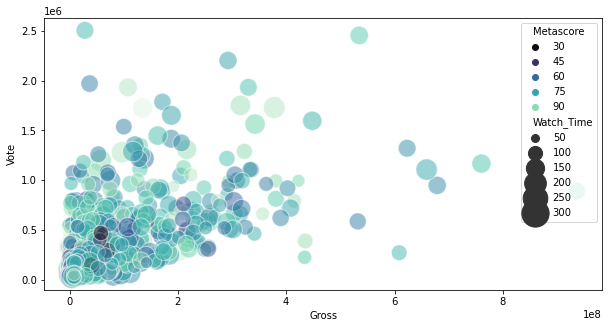

In [46]:
sns.scatterplot(data=df_subset1, x="Gross", y="Vote",hue='Metascore' ,size='Watch_Time',alpha=0.5, sizes=(50, 800), palette='mako')

# show the graph
# figure size in inches
sns.color_palette("mako", as_cmap=True)
rcParams['figure.figsize'] = 10, 5
plt.show()

In [47]:
df_subset2 =new_movie_list.groupby(['Movie_Name'])[['Vote']].sum().sort_values(by ='Vote', ascending = False).reset_index()
df_subset2.head(21)

,Movie_Name,Vote
0,The Shawshank Redemption,2503054
1,The Dark Knight,2452669
2,Inception,2200874
3,Fight Club,1969163
4,Forrest Gump,1932000
5,Pulp Fiction,1931511
6,The Matrix,1786334
7,The Lord of the Rings: The Fellowship of the Ring,1750527
8,The Lord of the Rings: The Return of the King,1729222
9,The Godfather,1725458


### Correlation

In [48]:
new_movie_list.corr()

,Year,Watch_Time,Movie_Rating,Metascore,Vote,Gross
Year,1.000000,0.182392,-0.092770,-0.220589,0.241860,0.238921
Watch_Time,0.182392,1.000000,0.244426,-0.050393,0.165839,0.132639
Movie_Rating,-0.092770,0.244426,1.000000,0.141018,0.460698,0.062042
Metascore,-0.220589,-0.050393,0.141018,1.000000,0.083942,0.029546
Vote,0.241860,0.165839,0.460698,0.083942,1.000000,0.604544
Gross,0.238921,0.132639,0.062042,0.029546,0.604544,1.000000


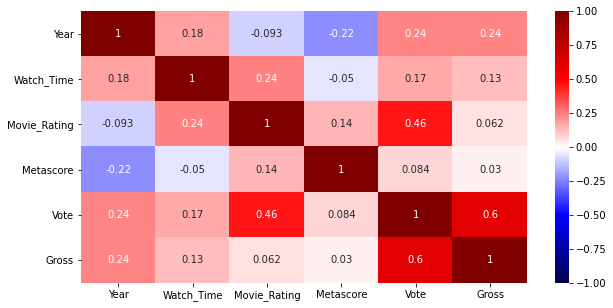

In [49]:
sns.heatmap(new_movie_list.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

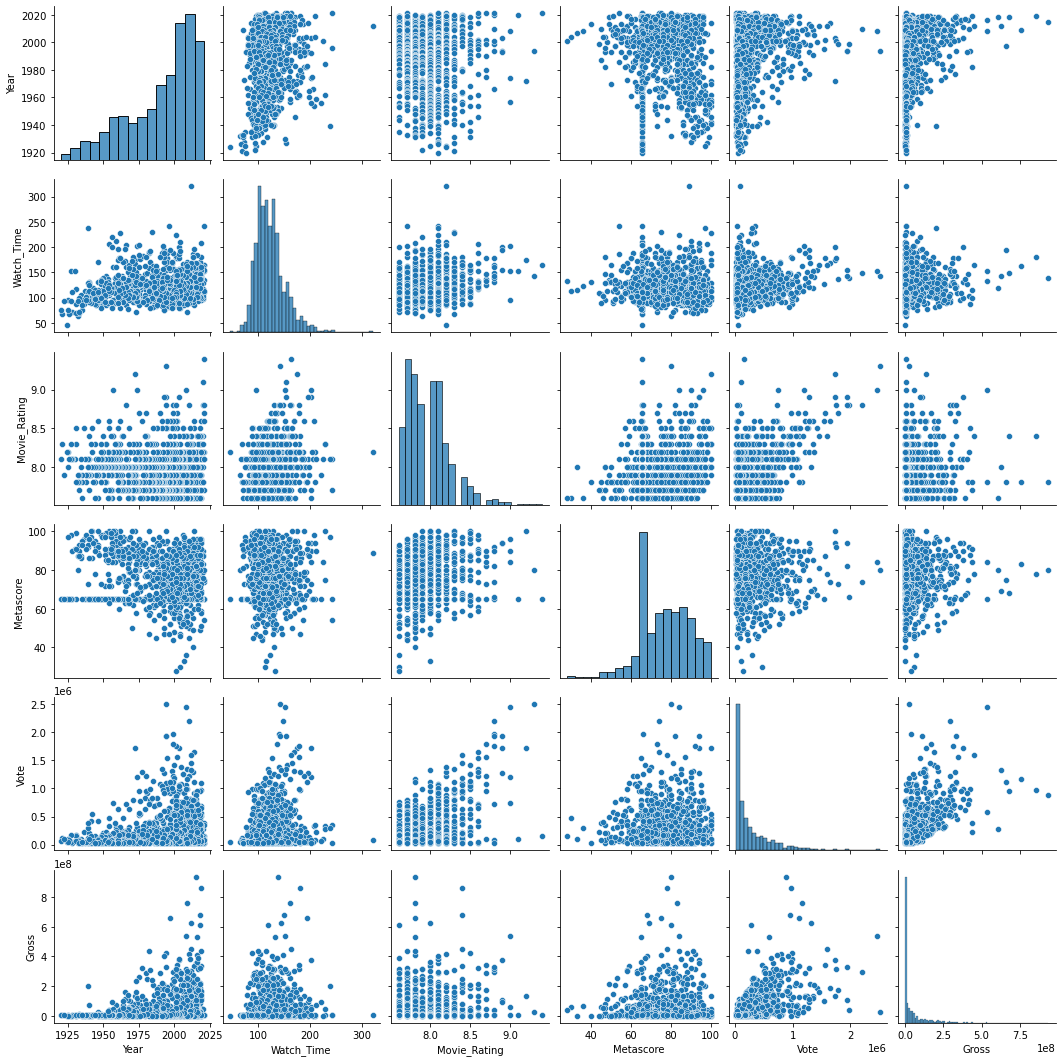

In [50]:
sns.pairplot(new_movie_list)

# Linear Regression

### Data Splitting:

In [54]:
movie_list_split = new_movie_list.loc[:, new_movie_list.columns != 'Movie_Name']
movie_list_split

,Year,Watch_Time,Movie_Rating,Metascore,Vote,Gross,Description
0,2021,164,9.4,65.24,155078,8220000.0,When a tribal man is arrested for a case of al...
1,1994,142,9.3,80.00,2503054,28340000.0,Two imprisoned men bond over a number of years...
2,1972,175,9.2,100.00,1725458,134970000.0,"The Godfather follows Vito Corleone, Don of th..."
3,2020,153,9.1,65.24,104279,8220000.0,"Nedumaaran Rajangam ""Maara"" sets out to make t..."
4,2008,152,9.0,84.00,2452669,534860000.0,When the menace known as the Joker wreaks havo...
...,...,...,...,...,...,...,...
995,1954,113,7.6,72.00,62727,8220000.0,A playboy becomes interested in the daughter o...
996,1953,118,7.6,85.00,45641,30500000.0,"At a U.S. Army base in 1941 Hawaii, a private ..."
997,1946,110,7.6,65.24,31209,8220000.0,A small-time gambler hired to work in a Buenos...
998,1944,97,7.6,78.00,28052,8220000.0,Several survivors of a torpedoed merchant ship...


In [55]:
movie_list_split = movie_list_split.loc[:, movie_list_split.columns != 'Description']
movie_list_split

,Year,Watch_Time,Movie_Rating,Metascore,Vote,Gross
0,2021,164,9.4,65.24,155078,8220000.0
1,1994,142,9.3,80.00,2503054,28340000.0
2,1972,175,9.2,100.00,1725458,134970000.0
3,2020,153,9.1,65.24,104279,8220000.0
4,2008,152,9.0,84.00,2452669,534860000.0
...,...,...,...,...,...,...
995,1954,113,7.6,72.00,62727,8220000.0
996,1953,118,7.6,85.00,45641,30500000.0
997,1946,110,7.6,65.24,31209,8220000.0
998,1944,97,7.6,78.00,28052,8220000.0


### Split into Training, Testing, and Validation sets


In [56]:
X = movie_list_split.drop(['Gross'], axis = 1)
y = movie_list_split['Gross']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

## Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print(f"Training Score: {lr.score(X_train,y_train)}")
print(f"Validation Score: {lr.score(X_val,y_val)}")

Training Score: 0.47454643771392346
Validation Score: 0.3385695748773869


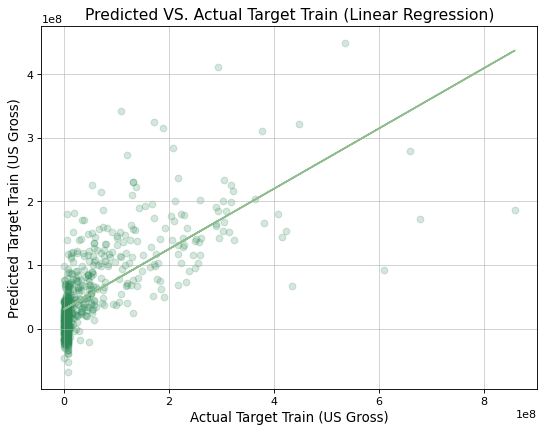

In [78]:
y_train_pred = lr.predict(X_train)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='seagreen')

m, b = np.polyfit(y_train, y_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='darkseagreen')

plt.xlabel('Actual Target Train (US Gross)', fontsize=12)
plt.ylabel('Predicted Target Train (US Gross)', fontsize=12)
plt.title('Predicted VS. Actual Target Train (Linear Regression)', fontsize=14)
plt.grid(linewidth=0.5)

### Kfold LR

In [60]:
def linear_reg_kfold(X_train, y_train):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    #print Training score
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f"Training Score: {round(lm.score(X_train, y_train), 9)}")

    #print Validation score
    valid_scores = cross_val_score(lm, X_train, y_train, cv=kf)
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return lm

In [61]:
linear_reg_kfold(X_train,y_train)

Training Score: 0.474546438
Validation Mean Score: 0.459359399


LinearRegression()

### Polynomial Regression

In [62]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [63]:
poly_model.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression validation Score: {poly_model.score(X_val_poly, y_val):.8f}')

print(f'Degree 2 polynomial regression training Score: {poly_model.score(X_train_poly, y_train):.8f}')
print(f'Degree 2 polynomial regression testing Score: {poly_model.score(X_test_poly,y_test):.8f}')

Degree 2 polynomial regression validation Score: 0.44003267
Degree 2 polynomial regression training Score: 0.53764559
Degree 2 polynomial regression testing Score: 0.58248222


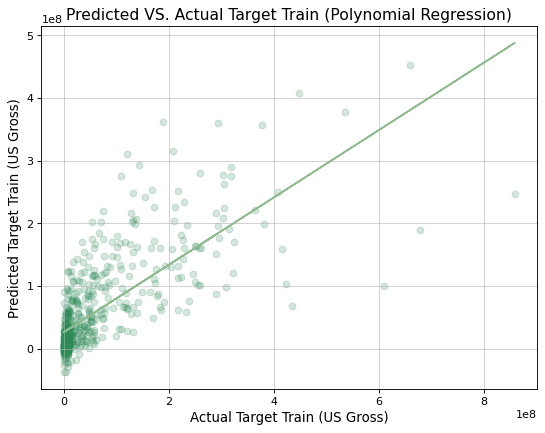

In [79]:
ypoly_train_pred = poly_model.predict(X_train_poly)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, ypoly_train_pred, alpha=0.2, color='seagreen')

m, b = np.polyfit(y_train, ypoly_train_pred, 1)

plt.plot(y_train, m*y_train + b, color='darkseagreen')

plt.xlabel('Actual Target Train (US Gross)', fontsize=12)
plt.ylabel('Predicted Target Train (US Gross)', fontsize=12)
plt.title('Predicted VS. Actual Target Train (Polynomial Regression)', fontsize=14)
plt.grid(linewidth=0.5)

### Ridge Regression

In [71]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [72]:
red_model.fit(X_train_scaled, y_train)

print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_train_scaled, y_train):.8f}')

Ridge Regression validation Score: 0.33885845
Ridge Regression Training Score: 0.47454317


In [73]:
def ridge_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = RidgeCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
    
        print("Best score:", m.best_score_)
    else:
        m = Ridge(alpha = regular_var) 
        m.fit(X_train, y_train )
        
        valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
        print(f"Training Score: {round(m.score(X_train,y_train), 9)}")
        print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return m

In [74]:
ridge_model(X_train, y_train)

Training Score: 0.474492806
Validation Mean Score: 0.459387872


Ridge(alpha=1)